# Importing Library and dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn import linear_model


In [2]:
df = pd.read_csv("household_power_consumption.csv", sep=';')
df

C:\Users\cinar\AppData\Local\Temp\ipykernel_6532\2371335474.py:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("household_power_consumption.csv", sep=';')


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0


## Cleaning the data
#### Checking for duplicates, Null/ NaN values.

In [3]:
format (len(df[df.duplicated()]))

'0'

In [4]:
df.isnull().sum()

Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [5]:
# Information about dataframe.

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB
None


In [6]:
df = df.replace(["?", ""], np.nan)

df[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']] = df[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].apply(pd.to_numeric)

df = df.dropna()
print(df.isnull().sum())


Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64


In [7]:
df.shape

(2049280, 9)

In [8]:
print(df.dtypes)

Date                      object
Time                      object
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object


In [9]:
df

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.000,239.70,3.8,0.0,0.0,0.0


## Exploratoy Data Analysis

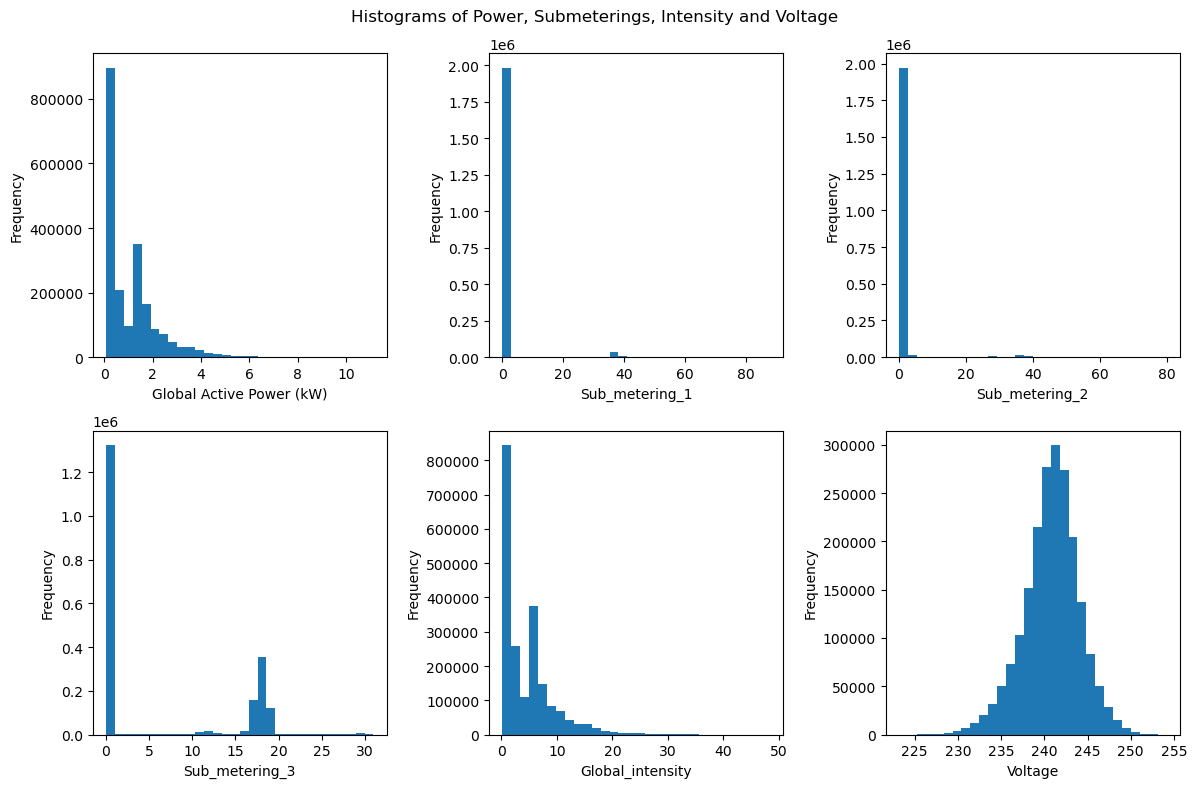

In [10]:
# Investigate the data distribution by columns, using Histogram:

global_active_power = df['Global_active_power']
submetering1 = df['Sub_metering_1']
submetering2 = df['Sub_metering_2']
submetering3 = df['Sub_metering_3']
global_intensity = df['Global_intensity']
voltage = df['Voltage']

fig, axs = plt.subplots(2, 3, figsize=(12, 8))
fig.suptitle('Histograms of Power, Submeterings, Intensity and Voltage')


axs[0, 0].hist(global_active_power, bins=30)
axs[0, 0].set_xlabel('Global Active Power (kW)')
axs[0, 0].set_ylabel('Frequency')

axs[0, 1].hist(submetering1, bins=30)
axs[0, 1].set_xlabel('Sub_metering_1')
axs[0, 1].set_ylabel('Frequency')

axs[0, 2].hist(submetering2, bins=30)
axs[0, 2].set_xlabel('Sub_metering_2')
axs[0, 2].set_ylabel('Frequency')

axs[1, 0].hist(submetering3, bins=30)
axs[1, 0].set_xlabel('Sub_metering_3')
axs[1, 0].set_ylabel('Frequency')

axs[1, 1].hist(global_intensity, bins=30)
axs[1, 1].set_xlabel('Global_intensity')
axs[1, 1].set_ylabel('Frequency')

axs[1, 2].hist(voltage, bins=30)
axs[1, 2].set_xlabel('Voltage')
axs[1, 2].set_ylabel('Frequency')



plt.tight_layout()
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

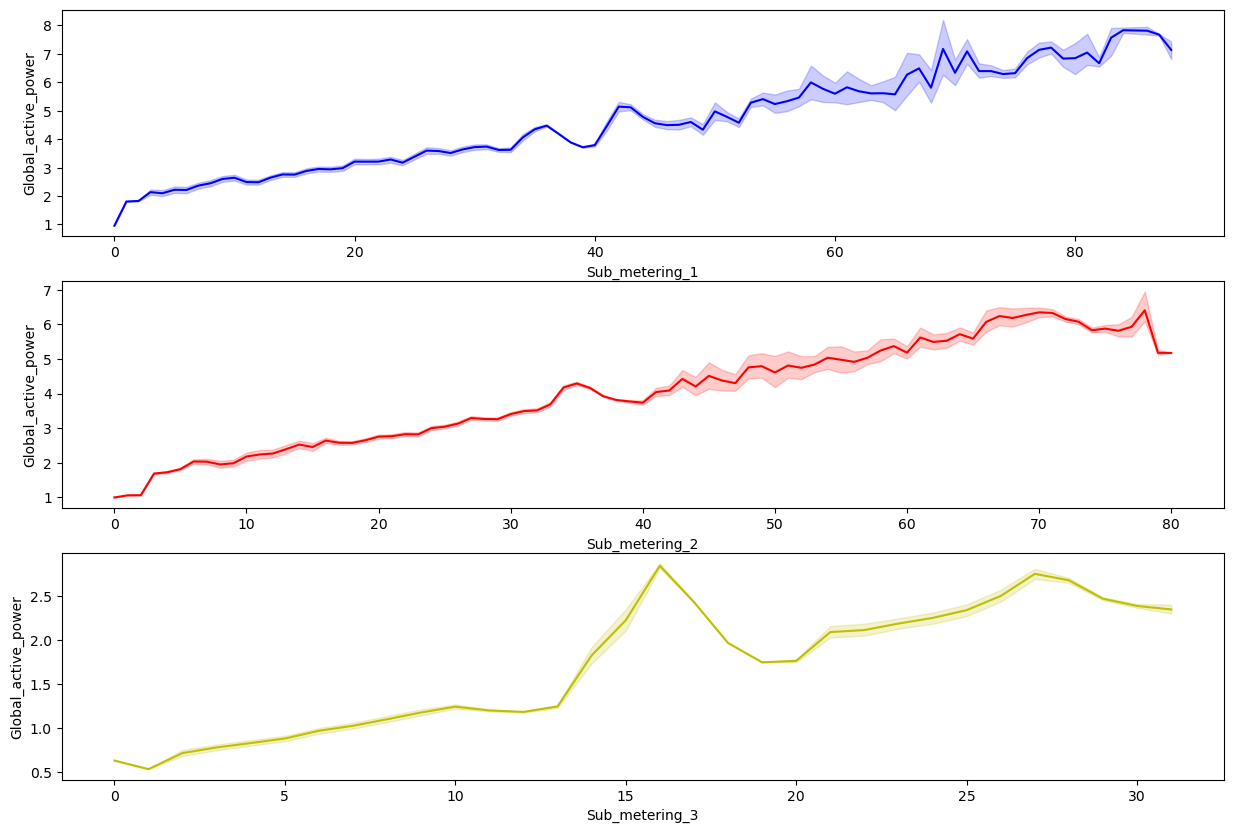

In [11]:
# Line chart to investigate the 'Global_active_power' consumption by Submeterings:

fig,ax = plt.subplots(3, 1,
                     figsize=(15,10))

sns.lineplot(x=df['Sub_metering_1'], y=df['Global_active_power'], ax = ax[0], color ='b')


sns.lineplot(x=df['Sub_metering_2'], y=df['Global_active_power'], ax = ax[1], color ='r')


sns.lineplot(x=df['Sub_metering_3'], y=df['Global_active_power'], ax = ax[2], color ='y')

plt.show

## Investigating the consumption by year, month and weekday.

In [12]:
# Converting 'Date' and 'Time' to 'date_time' column to datetime format.

df['date_time'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])

In [13]:
# Creating columns for year, month and weekday.

df['Year'] = df['date_time'].apply(lambda x: x.year)
df['Month'] = df['date_time'].apply(lambda x: x.month)

df['Weekday'] = df['date_time'].dt.day_name()


In [14]:
df.sort_values(by='date_time', inplace=True)
df

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,date_time,Year,Month,Weekday
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00,2006,12,Saturday
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00,2006,12,Saturday
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00,2006,12,Saturday
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00,2006,12,Saturday
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00,2006,12,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2055271,12/11/2010,23:55:00,0.690,0.062,244.16,2.8,0.0,0.0,0.0,2010-12-11 23:55:00,2010,12,Saturday
2055272,12/11/2010,23:56:00,0.688,0.060,243.82,2.8,0.0,0.0,0.0,2010-12-11 23:56:00,2010,12,Saturday
2055273,12/11/2010,23:57:00,0.688,0.062,244.20,2.8,0.0,0.0,0.0,2010-12-11 23:57:00,2010,12,Saturday
2055274,12/11/2010,23:58:00,0.688,0.062,244.21,2.8,0.0,0.0,0.0,2010-12-11 23:58:00,2010,12,Saturday


In [15]:
# Dropping the column 'Global_reactive_power'.

data = df.loc[:,['date_time', 'Year', 'Month', 'Weekday', 'Global_active_power','Voltage','Global_intensity','Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']]

data.head()

,date_time,Year,Month,Weekday,Global_active_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,2006,12,Saturday,4.216,234.84,18.4,0.0,1.0,17.0
1,2006-12-16 17:25:00,2006,12,Saturday,5.360,233.63,23.0,0.0,1.0,16.0
2,2006-12-16 17:26:00,2006,12,Saturday,5.374,233.29,23.0,0.0,2.0,17.0
3,2006-12-16 17:27:00,2006,12,Saturday,5.388,233.74,23.0,0.0,1.0,17.0
4,2006-12-16 17:28:00,2006,12,Saturday,3.666,235.68,15.8,0.0,1.0,17.0


In [16]:
print(data.dtypes)

date_time              datetime64[ns]
Year                            int64
Month                           int64
Weekday                        object
Global_active_power           float64
Voltage                       float64
Global_intensity              float64
Sub_metering_1                float64
Sub_metering_2                float64
Sub_metering_3                float64
dtype: object


In [17]:
# Summary statistics:

data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,2049280.0,2008.424761,1.124388,2006.000,2007.000,2008.000,2009.000,2010.000
Month,2049280.0,6.497968,3.446016,1.000,4.000,7.000,10.000,12.000
Global_active_power,2049280.0,1.091615,1.057294,0.076,0.308,0.602,1.528,11.122
Voltage,2049280.0,240.839858,3.239987,223.200,238.990,241.010,242.890,254.150
Global_intensity,2049280.0,4.627759,4.444396,0.200,1.400,2.600,6.400,48.400
Sub_metering_1,2049280.0,1.121923,6.153031,0.000,0.000,0.000,0.000,88.000
Sub_metering_2,2049280.0,1.298520,5.822026,0.000,0.000,0.000,1.000,80.000
Sub_metering_3,2049280.0,6.458447,8.437154,0.000,0.000,1.000,17.000,31.000


In [18]:
data.sort_values(by='date_time', inplace=True)
data

,date_time,Year,Month,Weekday,Global_active_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,2006,12,Saturday,4.216,234.84,18.4,0.0,1.0,17.0
1,2006-12-16 17:25:00,2006,12,Saturday,5.360,233.63,23.0,0.0,1.0,16.0
2,2006-12-16 17:26:00,2006,12,Saturday,5.374,233.29,23.0,0.0,2.0,17.0
3,2006-12-16 17:27:00,2006,12,Saturday,5.388,233.74,23.0,0.0,1.0,17.0
4,2006-12-16 17:28:00,2006,12,Saturday,3.666,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...,...,...,...
2055271,2010-12-11 23:55:00,2010,12,Saturday,0.690,244.16,2.8,0.0,0.0,0.0
2055272,2010-12-11 23:56:00,2010,12,Saturday,0.688,243.82,2.8,0.0,0.0,0.0
2055273,2010-12-11 23:57:00,2010,12,Saturday,0.688,244.20,2.8,0.0,0.0,0.0
2055274,2010-12-11 23:58:00,2010,12,Saturday,0.688,244.21,2.8,0.0,0.0,0.0


<function matplotlib.pyplot.show(close=None, block=None)>

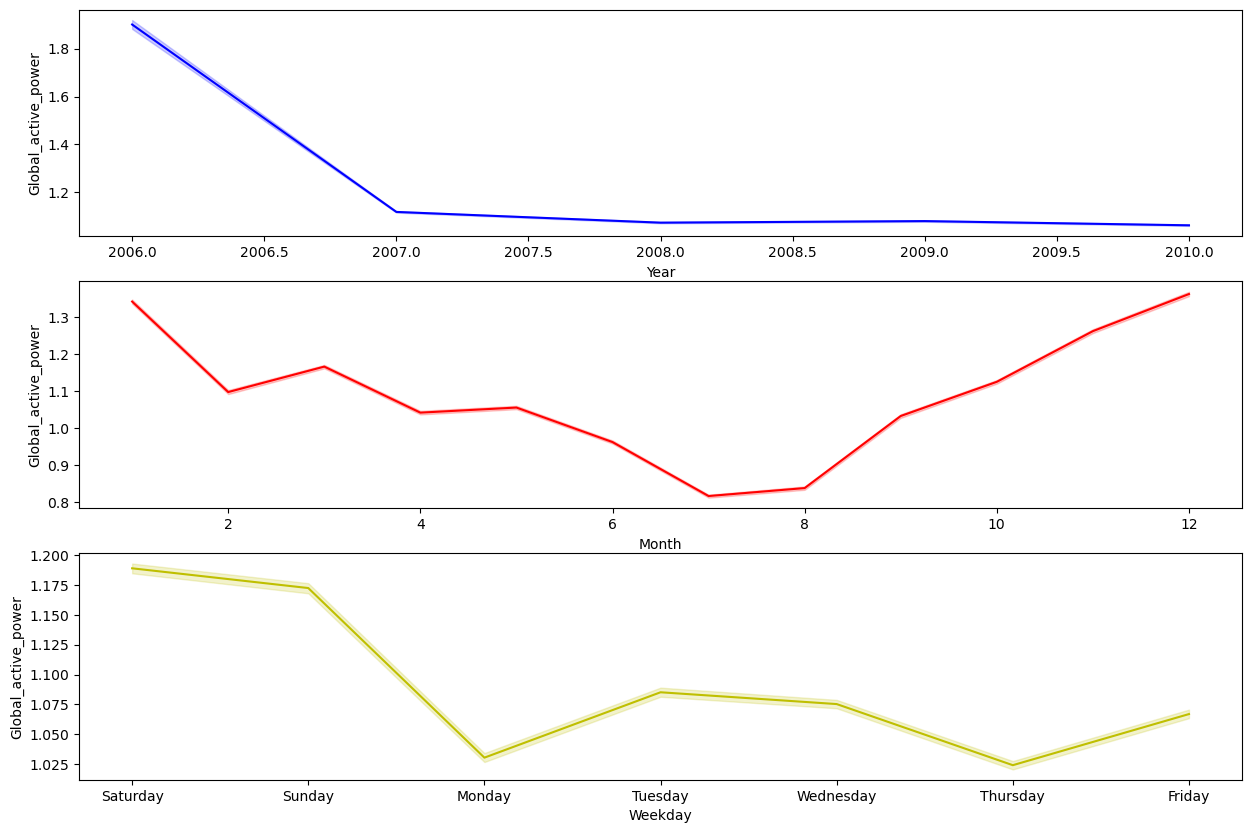

In [45]:
# Visualizaton of Global active power across Yearly, Monthly and Weekly:
fig,ax = plt.subplots(3, 1,
                     figsize=(15,10))

sns.lineplot(x=data['Year'], y=data['Global_active_power'], ax = ax[0], color ='b')


sns.lineplot(x=data['Month'], y=data['Global_active_power'], ax = ax[1], color ='r')


sns.lineplot(x=data['Weekday'], y=data['Global_active_power'], ax = ax[2], color ='y')

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

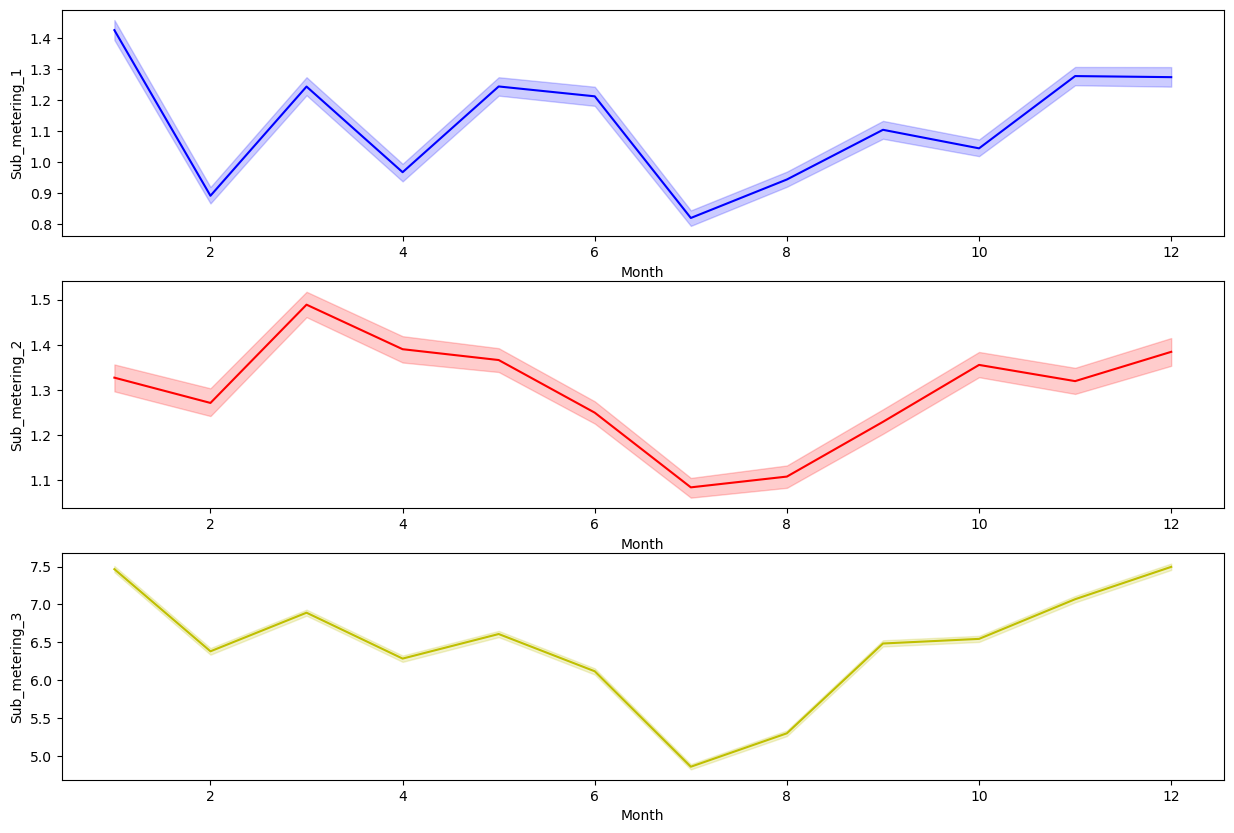

In [20]:
# Visualizaton of Submeterings across Yearly, Monthly and Weekly:

fig,ax = plt.subplots(3, 1,
                     figsize=(15,10))

sns.lineplot(x=data['Month'], y=data['Sub_metering_1'], ax = ax[0], color ='b')


sns.lineplot(x=data['Month'], y=data['Sub_metering_2'], ax = ax[1], color ='r')


sns.lineplot(x=data['Month'], y=data['Sub_metering_3'], ax = ax[2], color ='y')

plt.show

Text(0.5, 1.0, "Understanding the Shape of Distributions: Boxplot 'Sub_metering_1', 'Sub_metering_2', and 'Sub_metering_3'")

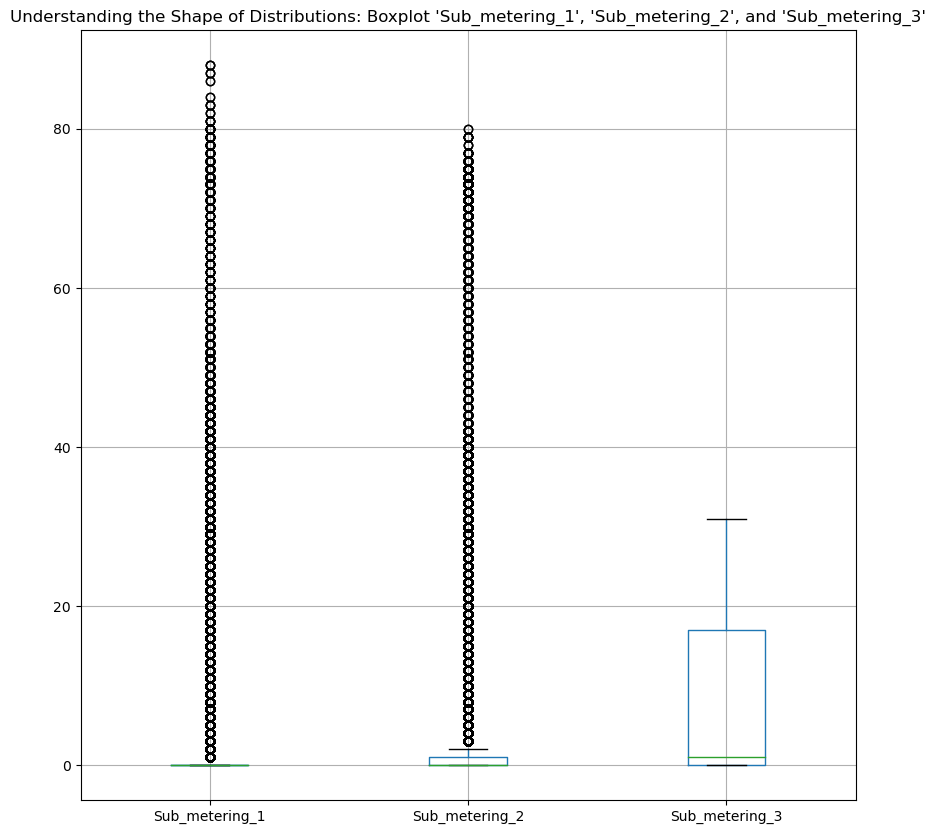

In [43]:
# 'Sub_metering_1', 'Sub_metering_2' and 'Sub_metering_3' box plot of data distribution.

ax = df.boxplot(['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3'], figsize=(10,  10))
plt.title("Understanding the Shape of Distributions: Boxplot 'Sub_metering_1', 'Sub_metering_2', and 'Sub_metering_3'")

In [22]:

sub_1_max = df['Sub_metering_1'].max()
sub_1_min = df['Sub_metering_1'].min()
sub_1_mean = df['Sub_metering_1'].mean()
sub_1_median = df['Sub_metering_1'].median()

sub_2_max = df['Sub_metering_2'].max()
sub_2_min = df['Sub_metering_2'].min()
sub_2_mean = df['Sub_metering_2'].mean()
sub_2_median = df['Sub_metering_2'].median()

sub_3_max = df['Sub_metering_3'].max()
sub_3_min = df['Sub_metering_3'].min()
sub_3_mean = df['Sub_metering_3'].mean()
sub_3_median = df['Sub_metering_3'].median()

table = {'Type': ['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3'],
        'Max value': [sub_1_max, sub_2_max, sub_3_max],
        'Min value': [sub_1_min, sub_2_min, sub_3_min],
        'Mean value': [sub_1_mean, sub_2_mean, sub_3_mean],
        'Median value': [sub_1_median, sub_2_median, sub_3_median]}

_table = pd.DataFrame(table)

_table



,Type,Max value,Min value,Mean value,Median value
0,Sub_metering_1,88.0,0.0,1.121923,0.0
1,Sub_metering_2,80.0,0.0,1.298520,0.0
2,Sub_metering_3,31.0,0.0,6.458447,1.0


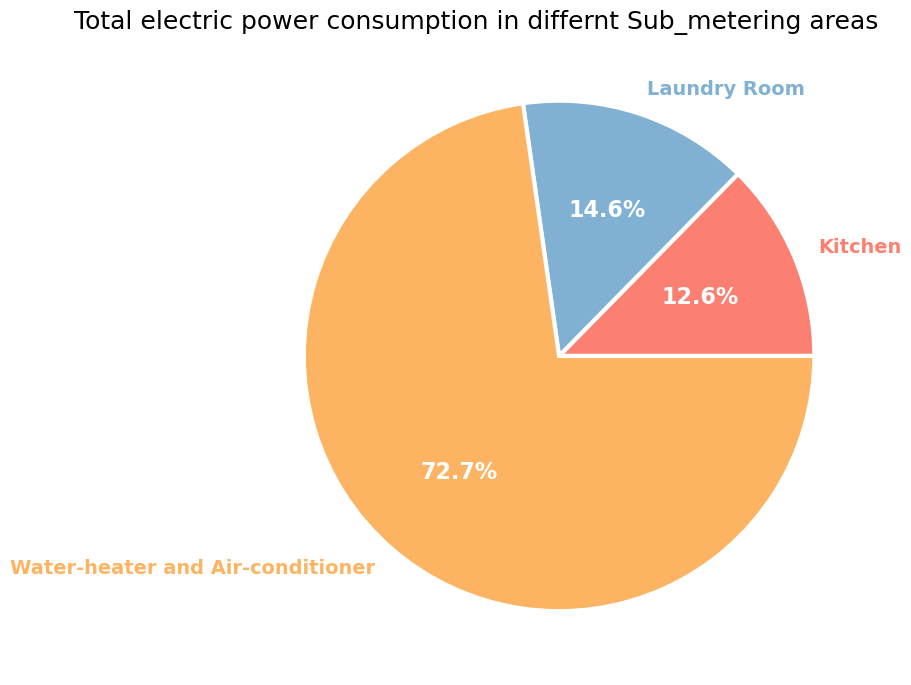

In [23]:
# Investigating the power consumption pattern by sub-metering areas:

cls = ['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
pie_df = df[cls].sum(axis=0)
labels = ['Kitchen', 'Laundry Room', 'Water-heater and Air-conditioner']

plt.figure(figsize=(9,9))
colors = sns.color_palette('Set3')[3:]
patches, texts, pcts = plt.pie(
                            pie_df, labels=labels, 
                            colors=colors,
                            autopct='%.1f%%',
                            wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
                            startangle=0
)

for i, patch in enumerate(patches):
  texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='white', fontsize=16, fontweight='bold')
plt.setp(texts, fontsize=14, fontweight='bold')
plt.title('Total electric power consumption in differnt Sub_metering areas', fontsize=18, loc='right')
plt.tight_layout()

# 4- Multicollinearity investigation

In [24]:
# Scaling

df_drop=df.drop(["Date", "Time", "date_time", "Year", "Month", "Weekday"], axis = 1)
df_drop.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [25]:
columns = df_drop.columns

scaler = MinMaxScaler()
normalised_dataset = scaler.fit_transform(df_drop)
normalised_dataset

normalised_df = pd.DataFrame(data = normalised_dataset, columns = columns)
normalised_df

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,0.374796,0.300719,0.376090,0.377593,0.0,0.0125,0.548387
1,0.478363,0.313669,0.336995,0.473029,0.0,0.0125,0.516129
2,0.479631,0.358273,0.326010,0.473029,0.0,0.0250,0.548387
3,0.480898,0.361151,0.340549,0.473029,0.0,0.0125,0.548387
4,0.325005,0.379856,0.403231,0.323651,0.0,0.0125,0.548387
...,...,...,...,...,...,...,...
2049275,0.055586,0.044604,0.677221,0.053942,0.0,0.0000,0.000000
2049276,0.055405,0.043165,0.666236,0.053942,0.0,0.0000,0.000000
2049277,0.055405,0.044604,0.678514,0.053942,0.0,0.0000,0.000000
2049278,0.055405,0.044604,0.678837,0.053942,0.0,0.0000,0.000000


# 5- Heatmap matrix and scatter plot

<Axes: >

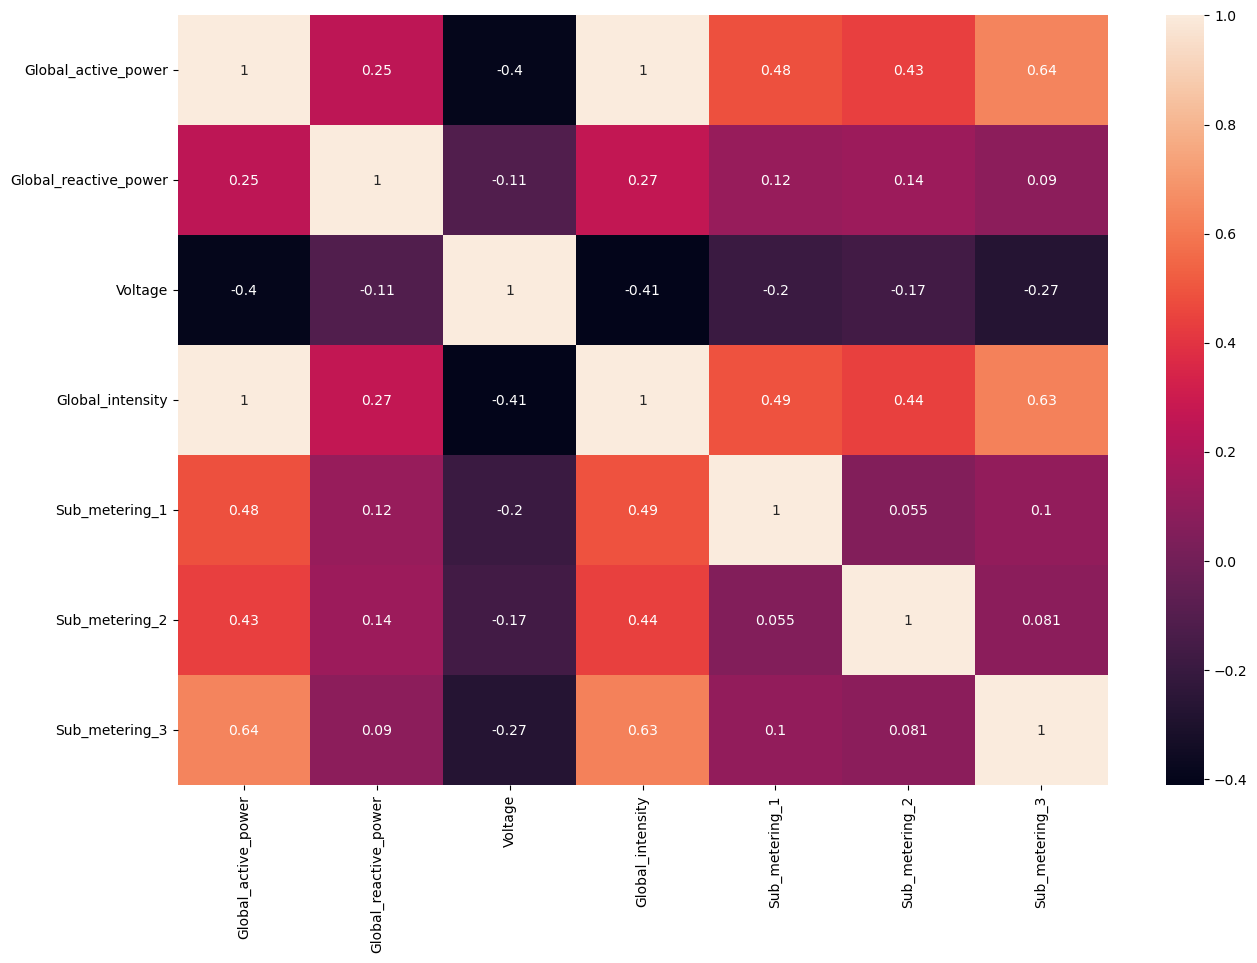

In [26]:
plt.figure(figsize=(15,10))
sns.heatmap(normalised_df.corr(method='pearson', min_periods=1), annot=True)

array([[<Axes: xlabel='Global_active_power', ylabel='Global_active_power'>,
        <Axes: xlabel='Global_reactive_power', ylabel='Global_active_power'>,
        <Axes: xlabel='Voltage', ylabel='Global_active_power'>,
        <Axes: xlabel='Global_intensity', ylabel='Global_active_power'>,
        <Axes: xlabel='Sub_metering_1', ylabel='Global_active_power'>,
        <Axes: xlabel='Sub_metering_2', ylabel='Global_active_power'>,
        <Axes: xlabel='Sub_metering_3', ylabel='Global_active_power'>],
       [<Axes: xlabel='Global_active_power', ylabel='Global_reactive_power'>,
        <Axes: xlabel='Global_reactive_power', ylabel='Global_reactive_power'>,
        <Axes: xlabel='Voltage', ylabel='Global_reactive_power'>,
        <Axes: xlabel='Global_intensity', ylabel='Global_reactive_power'>,
        <Axes: xlabel='Sub_metering_1', ylabel='Global_reactive_power'>,
        <Axes: xlabel='Sub_metering_2', ylabel='Global_reactive_power'>,
        <Axes: xlabel='Sub_metering_3', ylabel='Gl

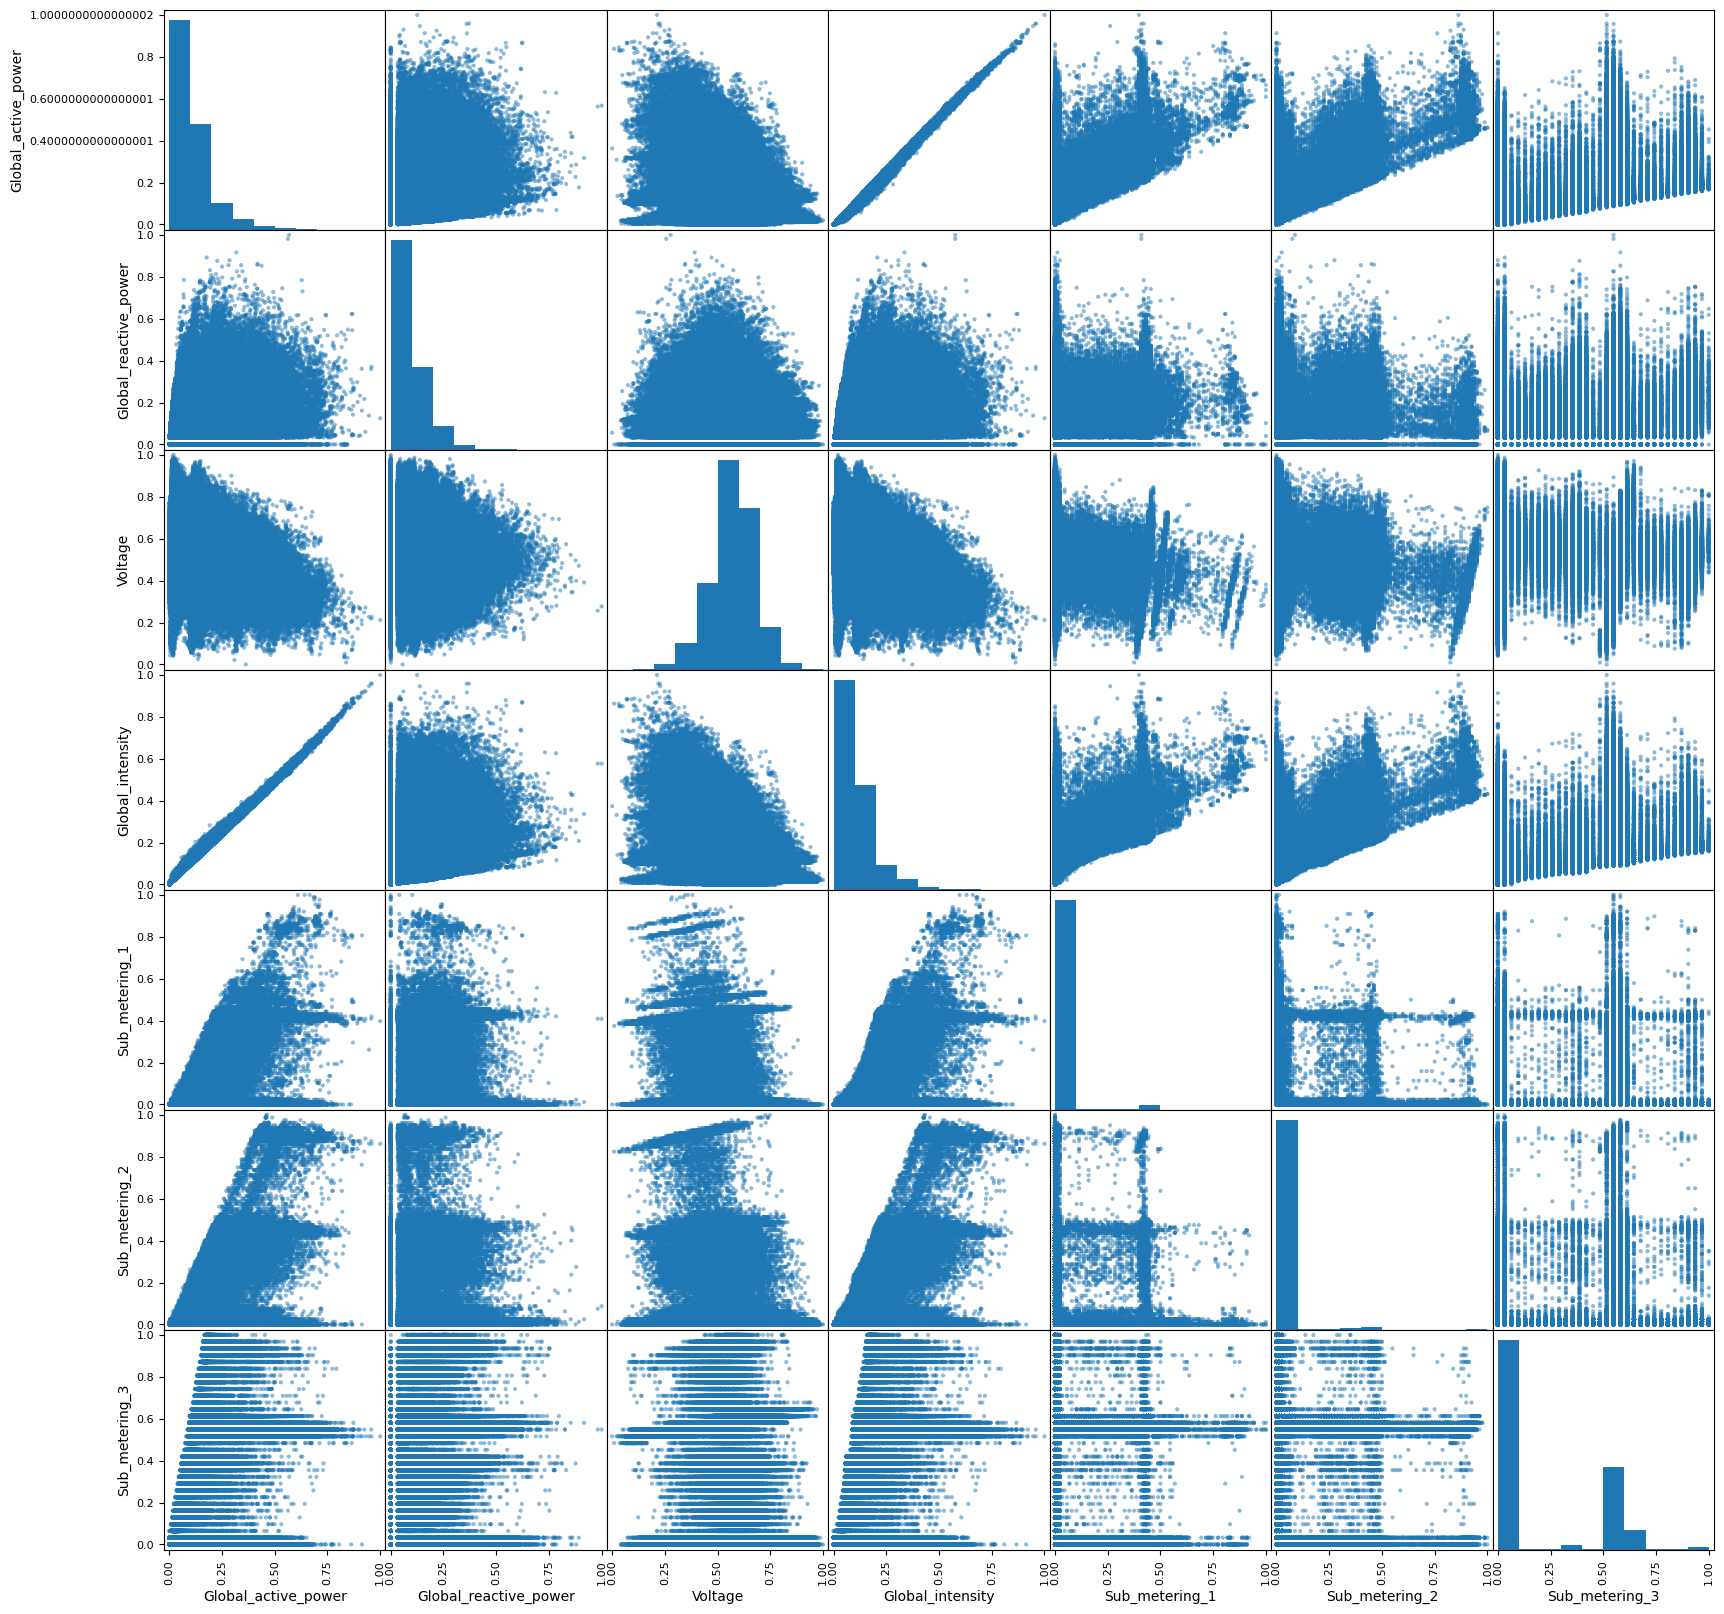

In [27]:
normalised_df.corr()
pd.plotting.scatter_matrix(normalised_df, figsize=[20,20])

# 6- Linear Regression investigation

In [28]:
# Simple Linear Regression Model. Investigating by Global active power as dependent variable.

reg = linear_model.LinearRegression()

import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('Global_active_power ~ Global_intensity', data=normalised_df).fit()

print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     Global_active_power   R-squared:                       0.998
Model:                             OLS   Adj. R-squared:                  0.998
Method:                  Least Squares   F-statistic:                 9.204e+08
Date:                 Fri, 14 Apr 2023   Prob (F-statistic):               0.00
Time:                         22:03:39   Log-Likelihood:             8.1606e+06
No. Observations:              2049280   AIC:                        -1.632e+07
Df Residuals:                  2049278   BIC:                        -1.632e+07
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.0033   

eval_env: 1


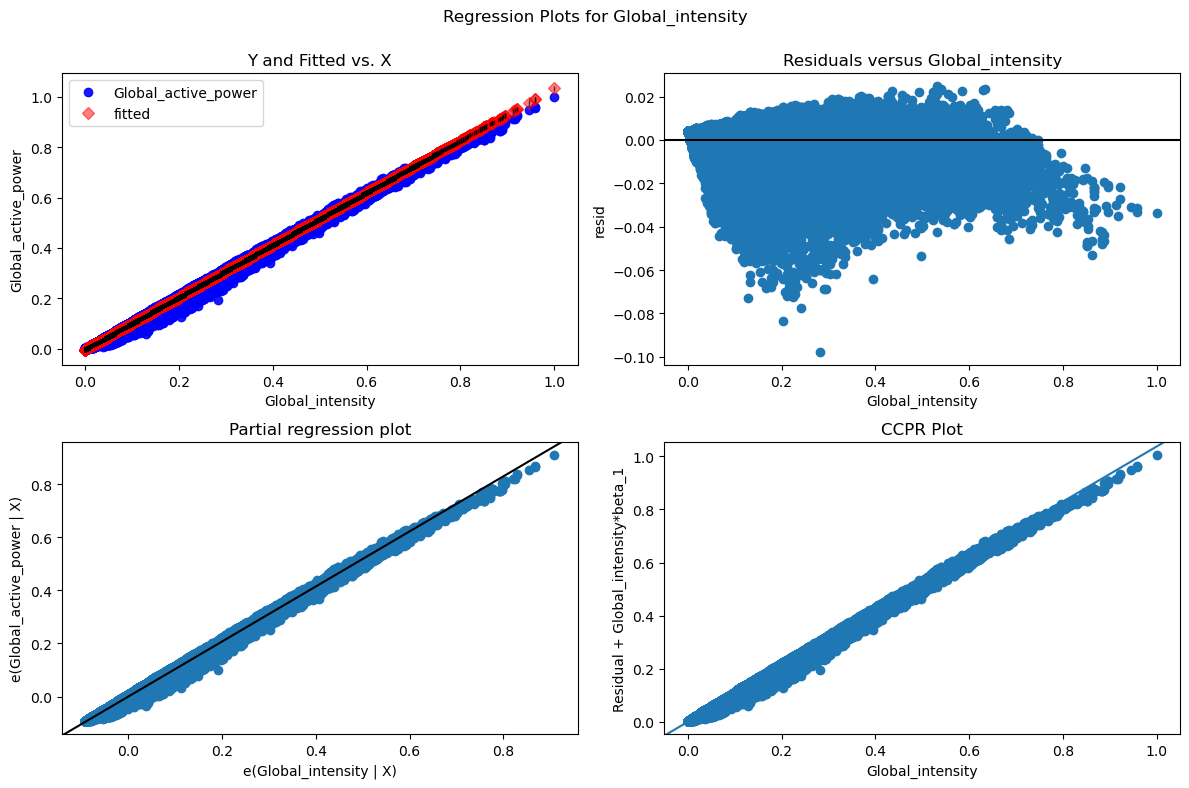

In [29]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'Global_intensity', fig=fig)

                             OLS Regression Results                            
Dep. Variable:     Global_active_power   R-squared:                       0.235
Model:                             OLS   Adj. R-squared:                  0.235
Method:                  Least Squares   F-statistic:                 6.283e+05
Date:                 Fri, 14 Apr 2023   Prob (F-statistic):               0.00
Time:                         22:06:03   Log-Likelihood:             2.1745e+06
No. Observations:              2049280   AIC:                        -4.349e+06
Df Residuals:                  2049278   BIC:                        -4.349e+06
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.0835   5.95e-

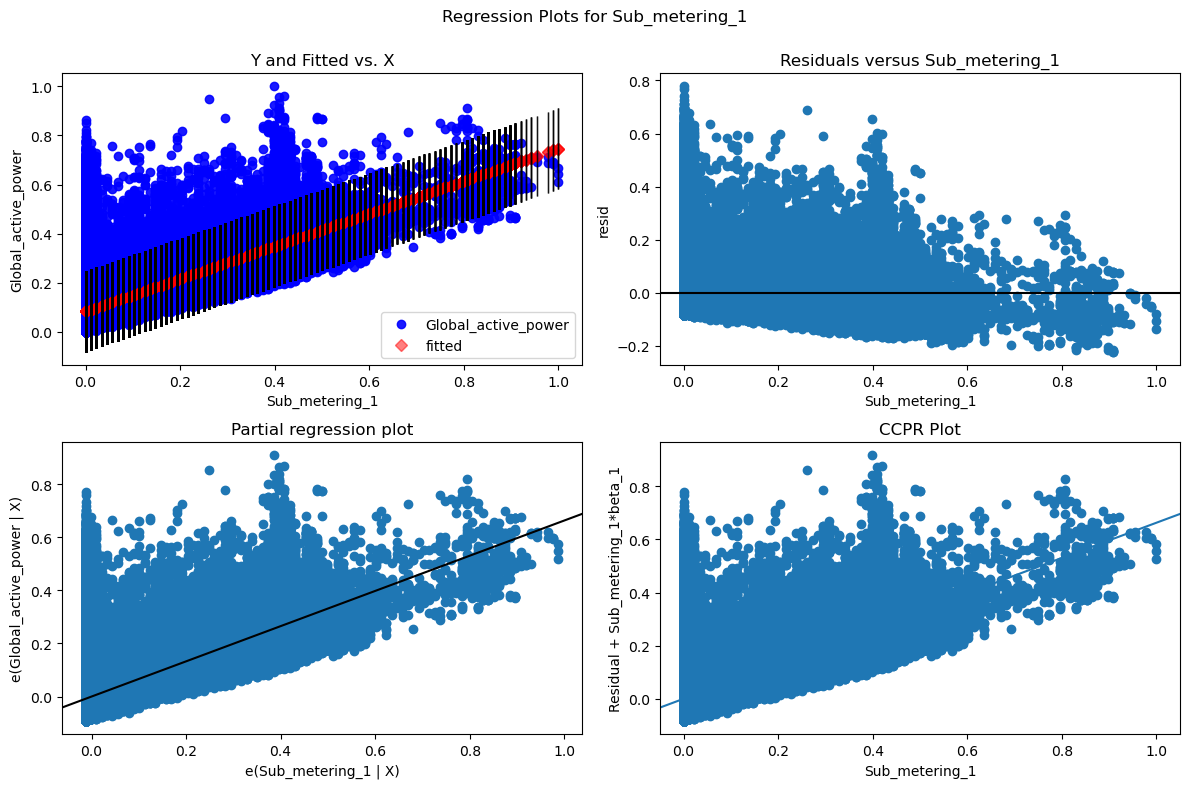

In [30]:
# Sub_metering_1

model = ols('Global_active_power ~ Sub_metering_1', data=normalised_df).fit()

print(model.summary())

fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'Sub_metering_1', fig=fig)

                             OLS Regression Results                            
Dep. Variable:     Global_active_power   R-squared:                       0.189
Model:                             OLS   Adj. R-squared:                  0.189
Method:                  Least Squares   F-statistic:                 4.771e+05
Date:                 Fri, 14 Apr 2023   Prob (F-statistic):               0.00
Time:                         22:09:01   Log-Likelihood:             2.1150e+06
No. Observations:              2049280   AIC:                        -4.230e+06
Df Residuals:                  2049278   BIC:                        -4.230e+06
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.0827   6.17e-

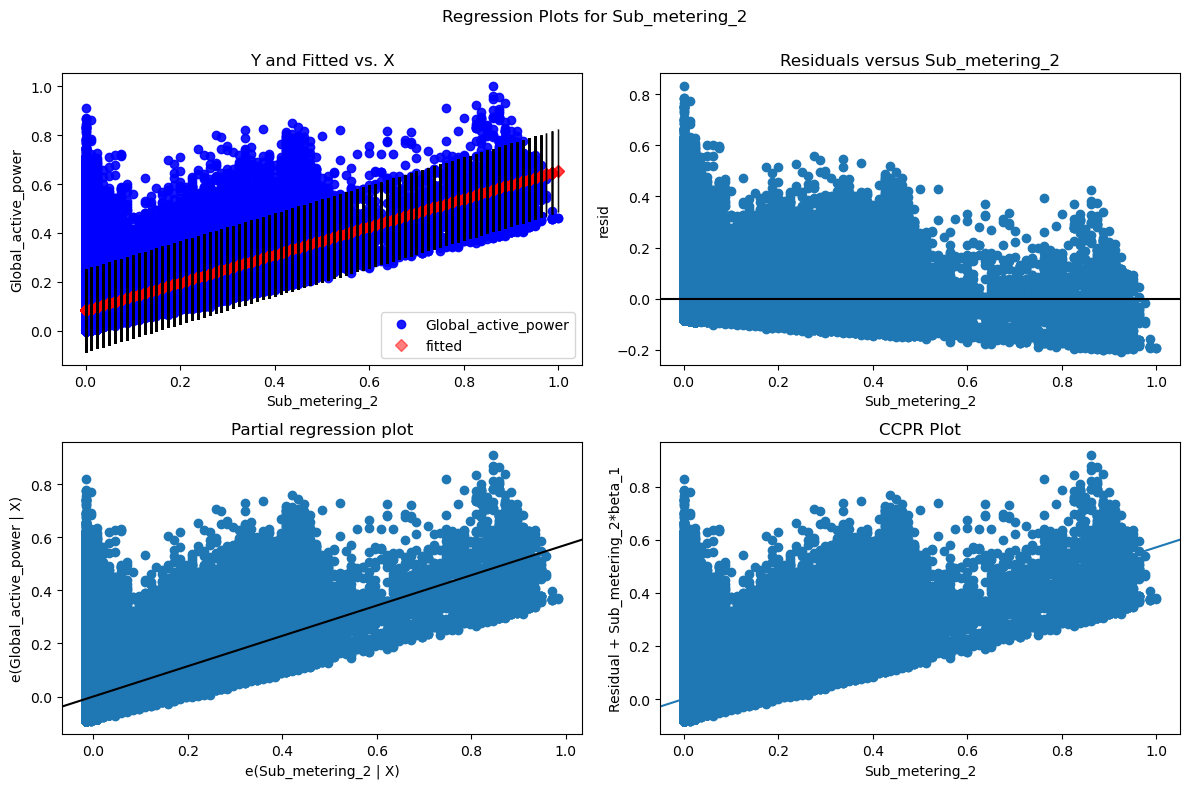

In [31]:
# Sub_metering_2

model = ols('Global_active_power ~ Sub_metering_2', data=normalised_df).fit()

print(model.summary())

fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'Sub_metering_2', fig=fig)

                             OLS Regression Results                            
Dep. Variable:     Global_active_power   R-squared:                       0.408
Model:                             OLS   Adj. R-squared:                  0.408
Method:                  Least Squares   F-statistic:                 1.411e+06
Date:                 Fri, 14 Apr 2023   Prob (F-statistic):               0.00
Time:                         22:12:05   Log-Likelihood:             2.4373e+06
No. Observations:              2049280   AIC:                        -4.875e+06
Df Residuals:                  2049278   BIC:                        -4.875e+06
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.0452   6.48e-

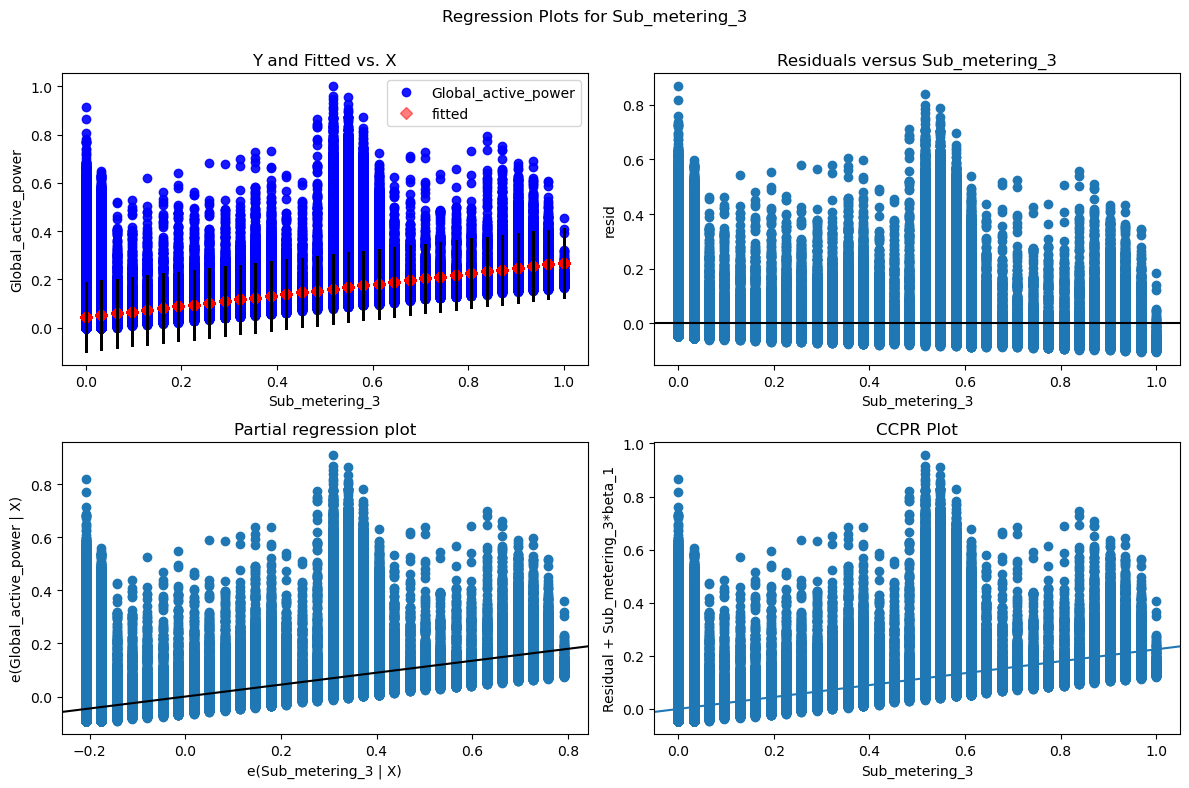

In [32]:
# Sub_metering_3:

model = ols('Global_active_power ~ Sub_metering_3', data=normalised_df).fit()

print(model.summary())

fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'Sub_metering_3', fig=fig)

                             OLS Regression Results                            
Dep. Variable:     Global_active_power   R-squared:                       0.160
Model:                             OLS   Adj. R-squared:                  0.160
Method:                  Least Squares   F-statistic:                 3.898e+05
Date:                 Fri, 14 Apr 2023   Prob (F-statistic):               0.00
Time:                         22:14:57   Log-Likelihood:             2.0790e+06
No. Observations:              2049280   AIC:                        -4.158e+06
Df Residuals:                  2049278   BIC:                        -4.158e+06
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3003      0.000    885.06

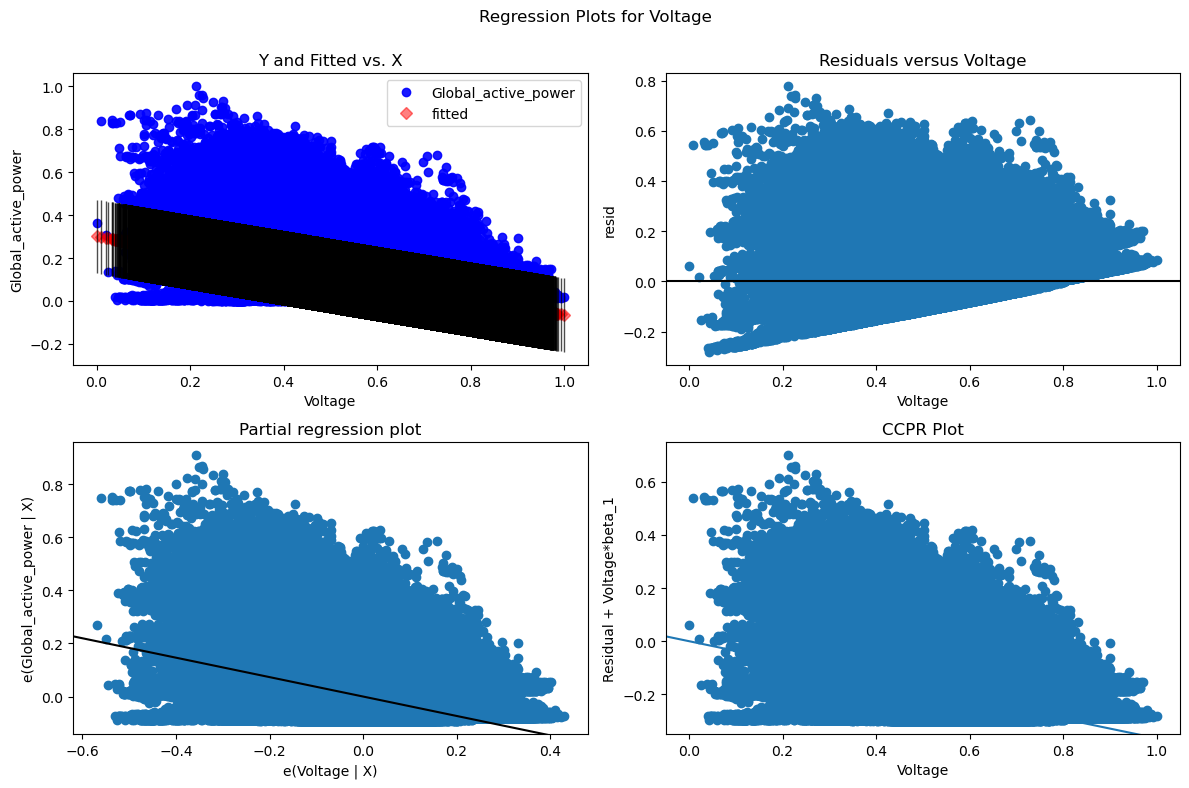

In [33]:
# Voltage:

model = ols('Global_active_power ~ Voltage', data=normalised_df).fit()

print(model.summary())

fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'Voltage', fig=fig)

                             OLS Regression Results                            
Dep. Variable:     Global_active_power   R-squared:                       0.061
Model:                             OLS   Adj. R-squared:                  0.061
Method:                  Least Squares   F-statistic:                 1.332e+05
Date:                 Fri, 14 Apr 2023   Prob (F-statistic):               0.00
Time:                         22:17:46   Log-Likelihood:             1.9650e+06
No. Observations:              2049280   AIC:                        -3.930e+06
Df Residuals:                  2049278   BIC:                        -3.930e+06
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept           

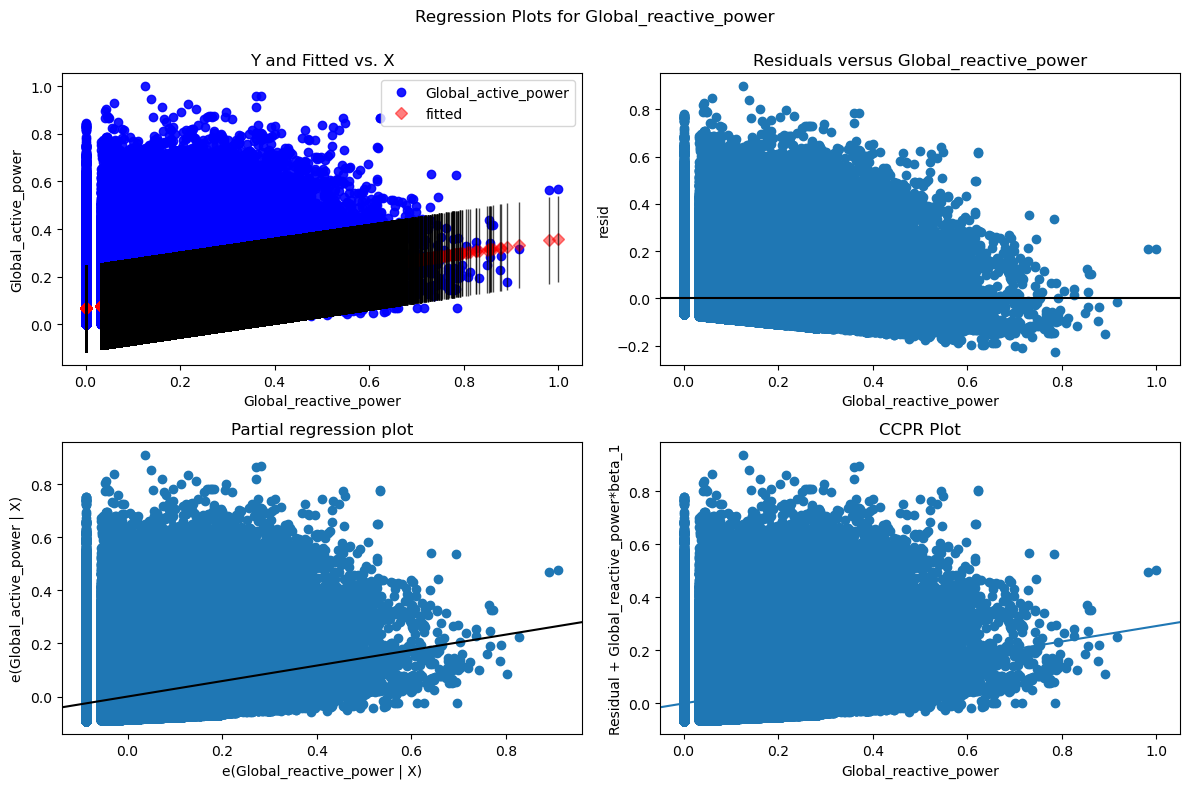

In [34]:
# Global_reactive_power:

model = ols('Global_active_power ~ Global_reactive_power', data=normalised_df).fit()

print(model.summary())

fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'Global_reactive_power', fig=fig)

In [35]:
# Table for R-squared, coefficient and p-value:

Table = {'Variable': ['Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3'],
        'R-squared': [0.998, 0.235, 0.189, 0.408],
         'Coefficient': [1.0369, 0.0832, 0.0789, 0.0800],
         'p-Value': [0.000, 0.000, 0.000, 0.000]}
table = pd.DataFrame(Table)
print('Table 3: R-sqaured, Coefficient and P-value obtained for simple linear regression, "Global_Intensity", "Sub_metering_1", "Sub_metering_2" and "Sub_metering_3":')
table

Table 3: R-sqaured, Coefficient and P-value obtained for simple linear regression, "Global_Intensity", "Sub_metering_1", "Sub_metering_2" and "Sub_metering_3":


,Variable,R-squared,Coefficient,p-Value
0,Global_intensity,0.998,1.0369,0.0
1,Sub_metering_1,0.235,0.0832,0.0
2,Sub_metering_2,0.189,0.0789,0.0
3,Sub_metering_3,0.408,0.0800,0.0


# 7- Applying multiple independent variable in a model

In [36]:
# Model 1, included the independent variables Submetering categories:

Model_1 = ols('Global_active_power ~ Sub_metering_1 + Sub_metering_2 + Sub_metering_3',
            data=normalised_df).fit()
print(Model_1.summary())

                             OLS Regression Results                            
Dep. Variable:     Global_active_power   R-squared:                       0.718
Model:                             OLS   Adj. R-squared:                  0.718
Method:                  Least Squares   F-statistic:                 1.741e+06
Date:                 Fri, 14 Apr 2023   Prob (F-statistic):               0.00
Time:                         22:20:45   Log-Likelihood:             3.1984e+06
No. Observations:              2049280   AIC:                        -6.397e+06
Df Residuals:                  2049276   BIC:                        -6.397e+06
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.0355   4.52e-

In [37]:
# Model 2, included the remain independent variables, Global intensity and voltage:

Model_2 = ols('Global_active_power ~ Sub_metering_1 + Sub_metering_2 + Sub_metering_3 + Global_intensity + Voltage',
            data=normalised_df).fit()
print(Model_2.summary())

                             OLS Regression Results                            
Dep. Variable:     Global_active_power   R-squared:                       0.998
Model:                             OLS   Adj. R-squared:                  0.998
Method:                  Least Squares   F-statistic:                 2.276e+08
Date:                 Fri, 14 Apr 2023   Prob (F-statistic):               0.00
Time:                         22:20:47   Log-Likelihood:             8.3777e+06
No. Observations:              2049280   AIC:                        -1.676e+07
Df Residuals:                  2049274   BIC:                        -1.676e+07
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.0113   

# 8- Checking Residuals for Normality distribution for Global active power

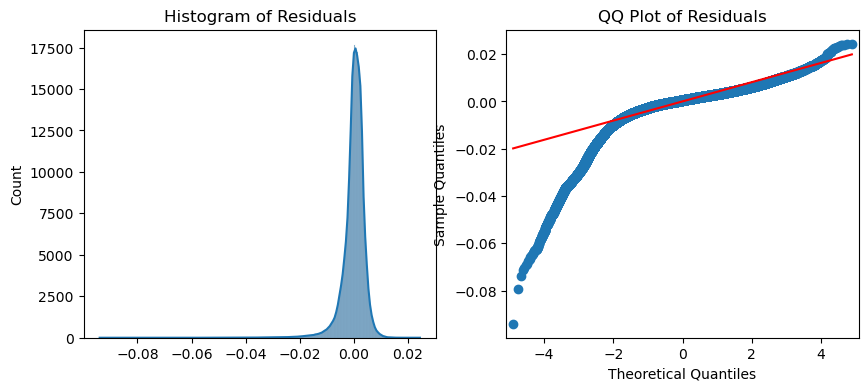

In [38]:
# Applying histogram and Q-Q plot:

residuals = Model_2.resid

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 4))

# Plot the histogram of the residuals
sns.histplot(residuals, kde=True, ax=ax1)
ax1.set_title('Histogram of Residuals')

# Plot the QQ plot of the residuals
sm.graphics.qqplot(residuals, line='s', ax=ax2)
ax2.set_title('QQ Plot of Residuals')

plt.show()

# 9- Checking Independence applying numerical analysis, Durbin-Watson:

In [39]:
from statsmodels.stats.stattools import durbin_watson

dw_test = durbin_watson(Model_2.resid)

dw_test

0.8601917065688713

In [8]:
!jupyter nbconvert --allow-chromium-download "C:\Users\cinar\Desktop\AUT\semester01_23\Foundations of Data Science\Assingment1.ipynb"



This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Execute the notebook prior to export.
    Equivalent to: [--ExecutePr

[NbConvertApp] WARNING | pattern 'C:\\Users\\cinar\\Desktop\\AUT\\semester01_23\\Foundations of Data Science\\Assingment1.ipynb' matched no files
